In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib
## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion


## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
! pip install xgboost
from xgboost import XGBRegressor


In [2]:
## read data
df_car=pd.read_csv('car_price_prediction.csv')
df_car

FileNotFoundError: [Errno 2] No such file or directory: 'car_price_prediction.csv'

In [ ]:
## get some info about data  
df_car.info()

##DATA CLEANING and preprocessing:

In [ ]:
## renam the names of columns to be callable for the model

In [ ]:
df_car.rename(columns={'Prod. year': 'Prod_year'}, inplace=True)
df_car.rename(columns={'Leather interior': 'Leather_interior'}, inplace=True)
df_car.rename(columns={'Fuel type': 'Fuel_type'}, inplace=True)
df_car.rename(columns={'Engine volume': 'Engine_volume'}, inplace=True)
df_car.rename(columns={'Gear box type': 'Gear_box_type'}, inplace=True)
df_car.rename(columns={'Drive wheels': 'Drive_wheels'}, inplace=True)

In [ ]:
## know the head of data
df_car.head()

In [ ]:
## get shape
df_car.shape

In [ ]:
df_car.duplicated().sum()

In [ ]:
## there are some duplicated
df_car.drop_duplicates(subset=["ID"],inplace=True)

In [ ]:
## drop usless column
df_car.drop('ID', axis=1, inplace=True)


In [ ]:
df_car.duplicated().unique()

In [ ]:
df_car.isna().sum(axis=0)

In [ ]:
df_car.isnull().sum()

In [ ]:
## check the shape again
df_car.shape

In [ ]:
## here i found the coulmn "levy" dtype is a object  
df_car.describe(include="O").T

In [ ]:
## here found the "-" and it must be number
df_car["Levy"].unique()

In [ ]:
## i need to get the mean of levy


In [3]:
## here i replaced the "_" to the "0" and convert the dtype from object to integer
df_car['Levy'] = df_car['Levy'].replace('-', '0')
df_car['Levy'] = df_car['Levy'].astype(int)
df_car.head()

NameError: name 'df_car' is not defined

In [4]:
df_car['Levy'].dtype

NameError: name 'df_car' is not defined

In [5]:
## get the describition of data 
df_car.describe().T

NameError: name 'df_car' is not defined

In [20]:
#as Mileage is a factor, removing "km" from it helps in improvising the prediction
df_car.Mileage.head()

0    186005 km
1    192000 km
2    200000 km
3    168966 km
4     91901 km
Name: Mileage, dtype: object

In [21]:
#we have to drop the km 
df_car['Mileage'] = df_car['Mileage'].replace("km", "", regex=True)
df_car['Mileage'] = df_car['Mileage'].astype(int)
print('The type of the Mileage column is:', df_car['Mileage'].dtype)
df_car.head(3)

The type of the Mileage column is: int64


,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [22]:
df_car.Mileage.unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [23]:
df_car.Doors.head()

0    04-May
1    04-May
2    04-May
3    04-May
4    04-May
Name: Doors, dtype: object

In [24]:
df_car["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [25]:
## this column mixed between object and integer ,, so we must make that integer field to be usefuel in model
df_car['Doors'].replace({'04-May':4, '02-Mar': 2, '>5':5}, inplace = True)
df_car['Doors'] = df_car['Doors'].astype('int64')

In [26]:
df_car['Doors'] =df_car['Doors'].astype('int64')

In [27]:
df_car["Doors"].unique()

array([4, 2, 5])

In [28]:
df_car['Engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [29]:
## this column mixed between object and integer ,, so we must make that float field to be usefuel in model

In [30]:
df_car['Engine_volume'] = df_car['Engine_volume'].replace("Turbo", "", regex=True)
df_car['Engine_volume'] =df_car['Engine_volume'].astype(float)
print('The type of the Engine_volume column is:', df_car['Engine_volume'].dtype)
df_car.head(3)

The type of the Engine_volume column is: float64


,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2


In [31]:
df_car['Cylinders'].unique()


array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

In [32]:
df_car.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4


In [33]:
df_car["Engine_volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [34]:
categorical_col=df_car.select_dtypes('O')
categorical_col



,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


In [35]:
numerical_col=df_car.select_dtypes('number')
numerical_col

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags
0,13328,1399,2010,3.5,186005,6.0,4,12
1,16621,1018,2011,3.0,192000,6.0,4,8
2,8467,0,2006,1.3,200000,4.0,4,2
3,3607,862,2011,2.5,168966,4.0,4,0
4,11726,446,2014,1.3,91901,4.0,4,4
...,...,...,...,...,...,...,...,...
19232,8467,0,1999,2.0,300000,4.0,2,5
19233,15681,831,2011,2.4,161600,4.0,4,8
19234,26108,836,2010,2.0,116365,4.0,4,4
19235,5331,1288,2007,2.0,51258,4.0,4,4


In [36]:
## visualization

In [37]:
col=df_car.columns
col

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [38]:
top_ten_price_car=df_car.groupby("Category")["Price"].sum().sort_values(ascending=False).head(10)
top_ten_price_car

Category
Jeep           127784008
Sedan          122143511
Hatchback       31781558
Goods wagon     28588384
Minivan         13040722
Coupe           11237084
Universal        9151577
Microbus         5543141
Pickup           1497482
Cabriolet         854279
Name: Price, dtype: int64

In [39]:
top_price_fuel_type=df_car.groupby("Fuel_type")["Price"].sum().sort_values(ascending=False).head(10)
top_price_fuel_type

Fuel_type
Petrol            172937630
Diesel            122769856
Hybrid             38382142
LPG                11788647
CNG                 3839637
Plug-in Hybrid      2010328
Hydrogen              20385
Name: Price, dtype: int64

In [40]:
current_year=2023
df_car["age_of_car"] =current_year-(df_car["Prod_year"])
df_car["age_of_car"]

0        13
1        12
2        17
3        12
4         9
         ..
19232    24
19233    12
19234    13
19235    16
19236    11
Name: age_of_car, Length: 18924, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='age_of_car'>

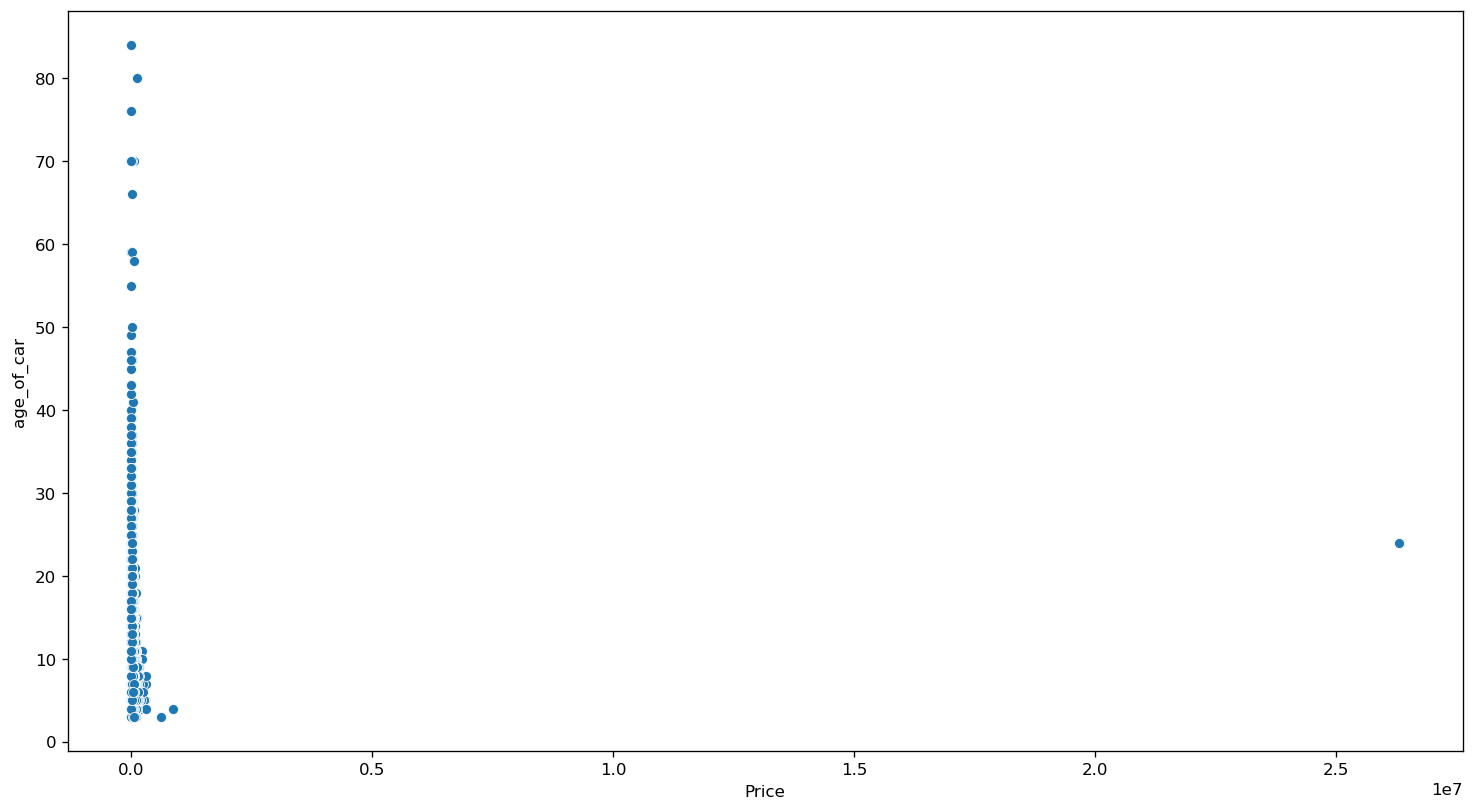

In [41]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df_car, x='Price', y="age_of_car", palette="hsv_r")

In [42]:
top_price_car_age=df_car.groupby("age_of_car")["Price"].sum().sort_values(ascending=False).head(10)
top_price_car_age

age_of_car
7     41059707
9     37440669
11    32716333
10    31974028
8     31943282
24    27866775
6     25406122
12    22209888
13    20905123
5     17374934
Name: Price, dtype: int64

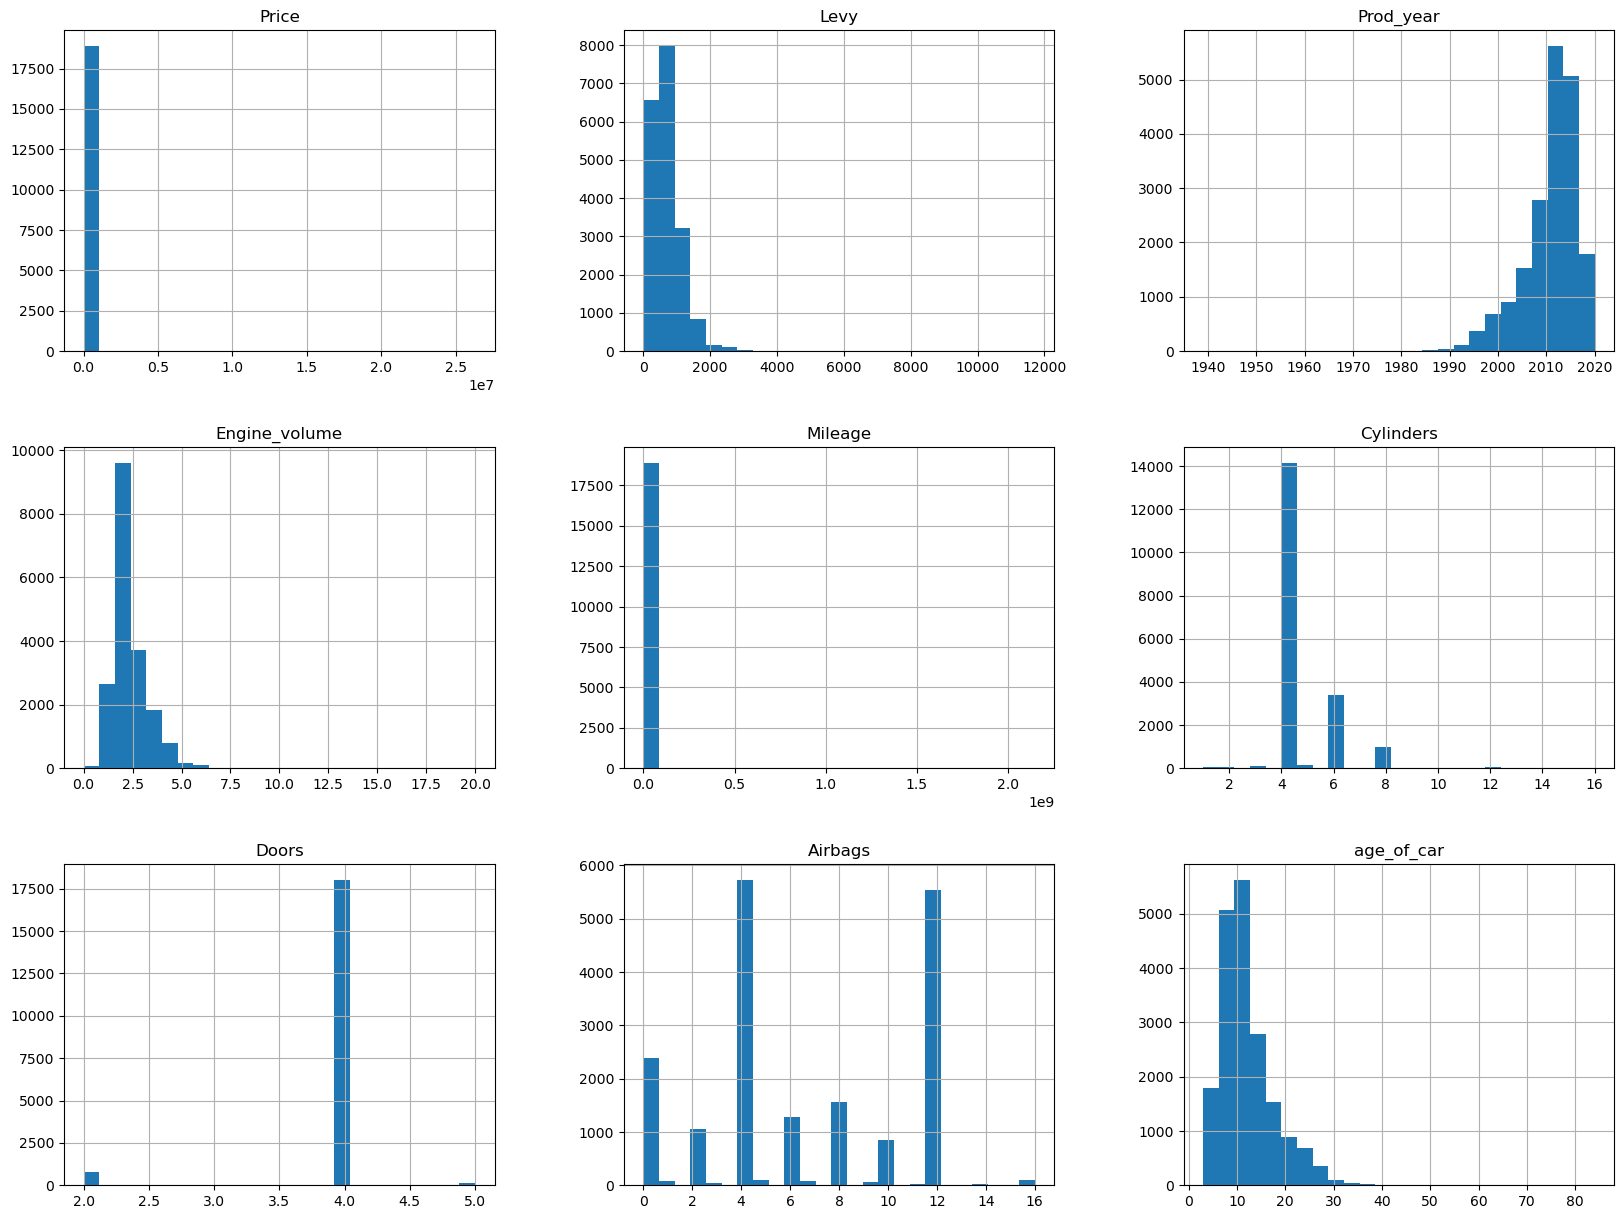

In [43]:
df_car.hist(bins=25, figsize=(20,15))
plt.show()

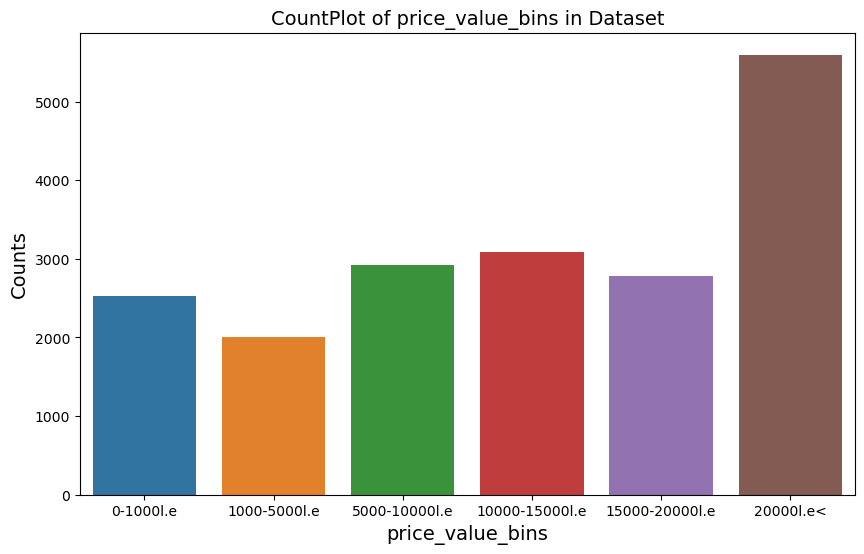

In [44]:
price_value_bins = pd.cut(x=df_car['Price'], 
                          bins=[-np.inf, 1000, 5000, 10000, 15000, 20000, np.inf],
                          labels=['0-1000l.e', '1000-5000l.e', '5000-10000l.e', '10000-15000l.e', '15000-20000l.e', '20000l.e<'])
plt.figure(figsize=(10, 6))
sns.countplot(x=price_value_bins)
plt.title('CountPlot of price_value_bins in Dataset', fontsize=14, c='k')
plt.xlabel('price_value_bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

<AxesSubplot:xlabel='Price'>

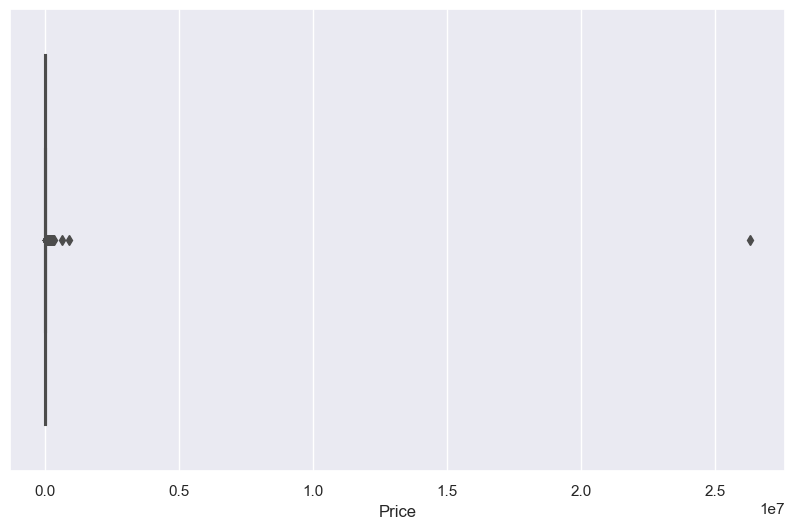

In [45]:
sns.set(rc = {'figure.figsize':(10,6)})

sns.boxplot(data = df_car , x ="Price")

In [46]:
def get_limits(data, col, Price) :
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - Price*IQR
    upper_limit = q3 + Price*IQR
    return lower_limit, upper_limit

In [47]:
lower_limit, upper_limit = get_limits(df_car, 'Price', 1.5)

In [48]:
df_car[(df_car['Price'] < lower_limit) | (df_car['Price'] > upper_limit)]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,age_of_car
14,59464,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000,4.0,Automatic,Front,4,Left wheel,White,4,7
36,51746,1077,TOYOTA,CHR Limited,2019,Jeep,No,Petrol,2.0,10200,4.0,Tiptronic,Front,4,Left wheel,Red,12,4
47,55390,1017,HYUNDAI,Santa FE,2017,Jeep,Yes,Diesel,2.0,100734,4.0,Automatic,Front,4,Left wheel,Black,4,6
56,87112,0,MERCEDES-BENZ,GLA 250,2019,Jeep,Yes,Petrol,2.0,5323,4.0,Tiptronic,4x4,4,Left wheel,Grey,0,4
73,53154,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,84506,4.0,Automatic,Front,4,Left wheel,Silver,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,56814,1017,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,67365,4.0,Automatic,Front,4,Left wheel,Black,4,6
19161,64290,0,LEXUS,RX 450 F SPORT,2012,Jeep,Yes,Hybrid,3.5,97000,6.0,Variator,4x4,4,Left wheel,Black,12,11
19180,63886,1076,HYUNDAI,Sonata,2020,Sedan,Yes,LPG,2.0,5305,4.0,Automatic,Front,4,Left wheel,Silver,4,3
19188,61154,579,TOYOTA,RAV 4,2017,Jeep,No,Hybrid,2.5,71234,4.0,Tiptronic,4x4,4,Left wheel,White,12,6


In [49]:
df_car.loc[(df_car['Price'] < lower_limit) | (df_car['Price'] > upper_limit), 'Price'] = upper_limit 

In [50]:
df_car["Price"].min()

1

In [51]:
df_car = df_car[df_car['Price'] > 500]
df_car

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,age_of_car
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,12
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12,10
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,24
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,12
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,13


<AxesSubplot:xlabel='Price'>

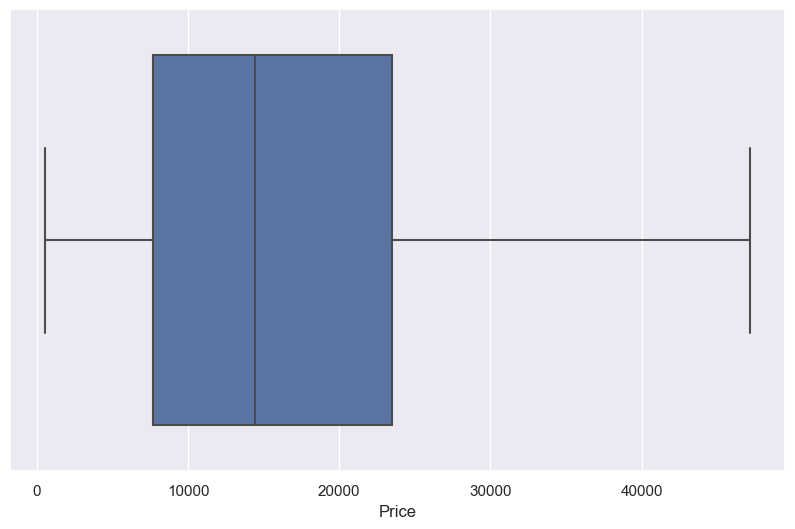

In [52]:
sns.set(rc = {'figure.figsize':(10,6)})

sns.boxplot(data = df_car , x ="Price")

In [53]:
df_car["Price"].min()

549

47161    1055
15681     274
14113     236
10976     233
12544     221
         ... 
41538       1
43815       1
25396       1
44000       1
22075       1
Name: Price, Length: 1792, dtype: int64


Text(0, 0.5, 'Counts')

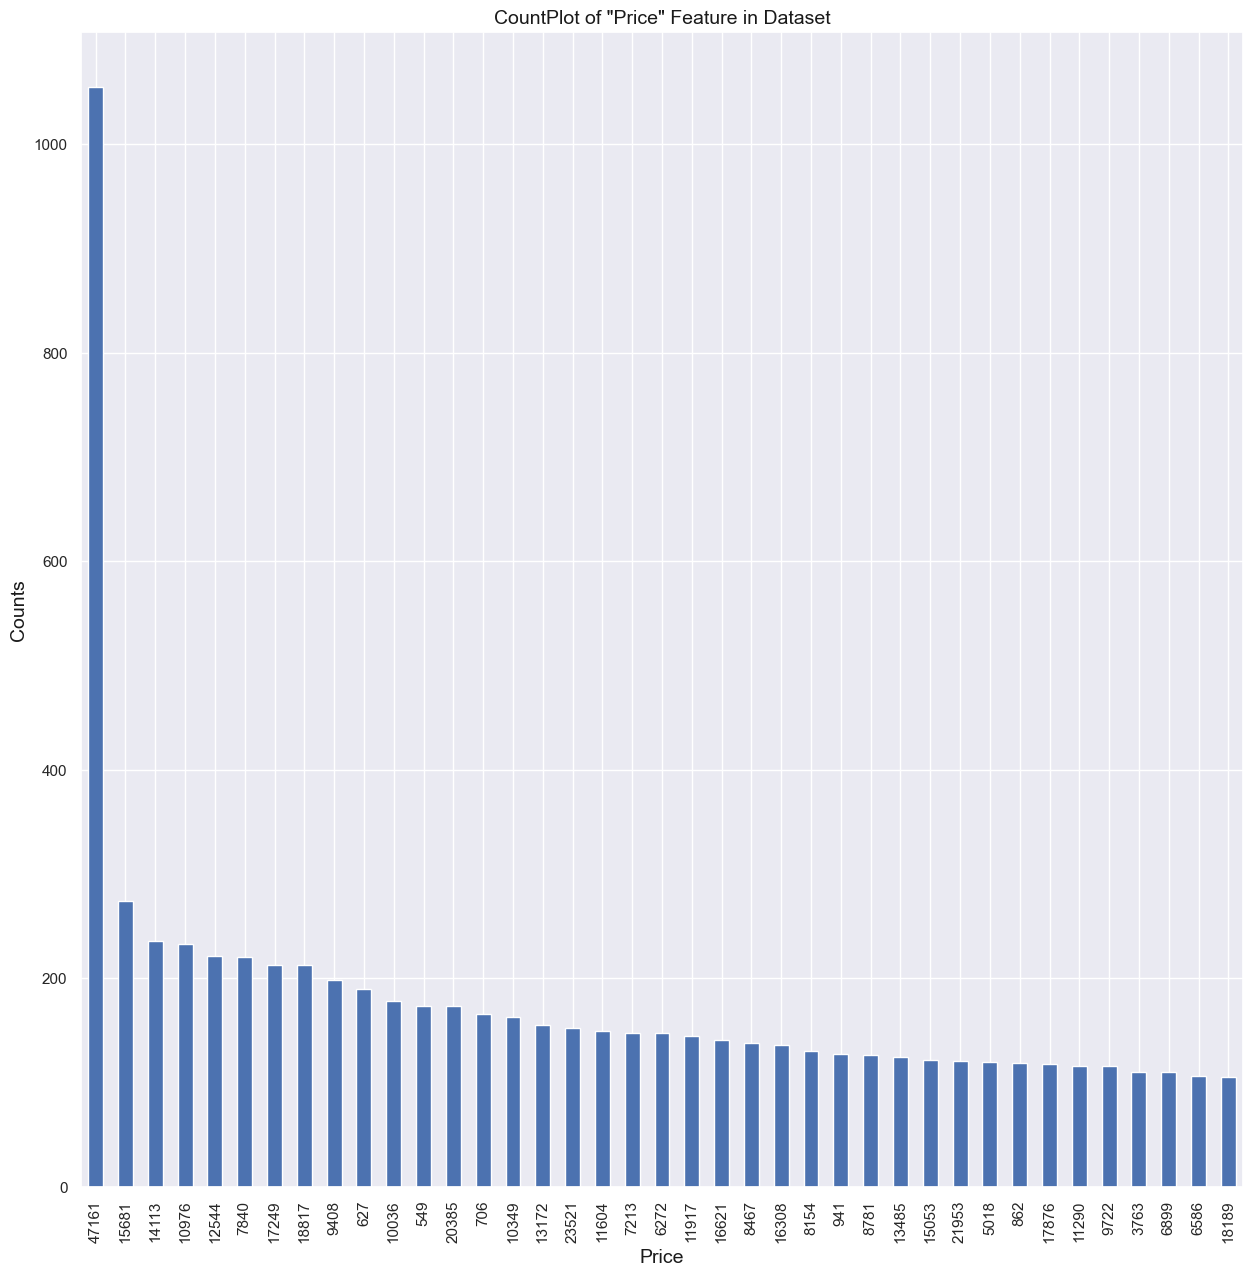

In [54]:
plt.figure(figsize = (15, 15))
price_values = df_car["Price"].value_counts()
print(price_values)
price_values[price_values > 100].plot(kind = 'bar')

plt.title('CountPlot of "Price" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Price', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

<AxesSubplot:xlabel='Price', ylabel='Levy'>

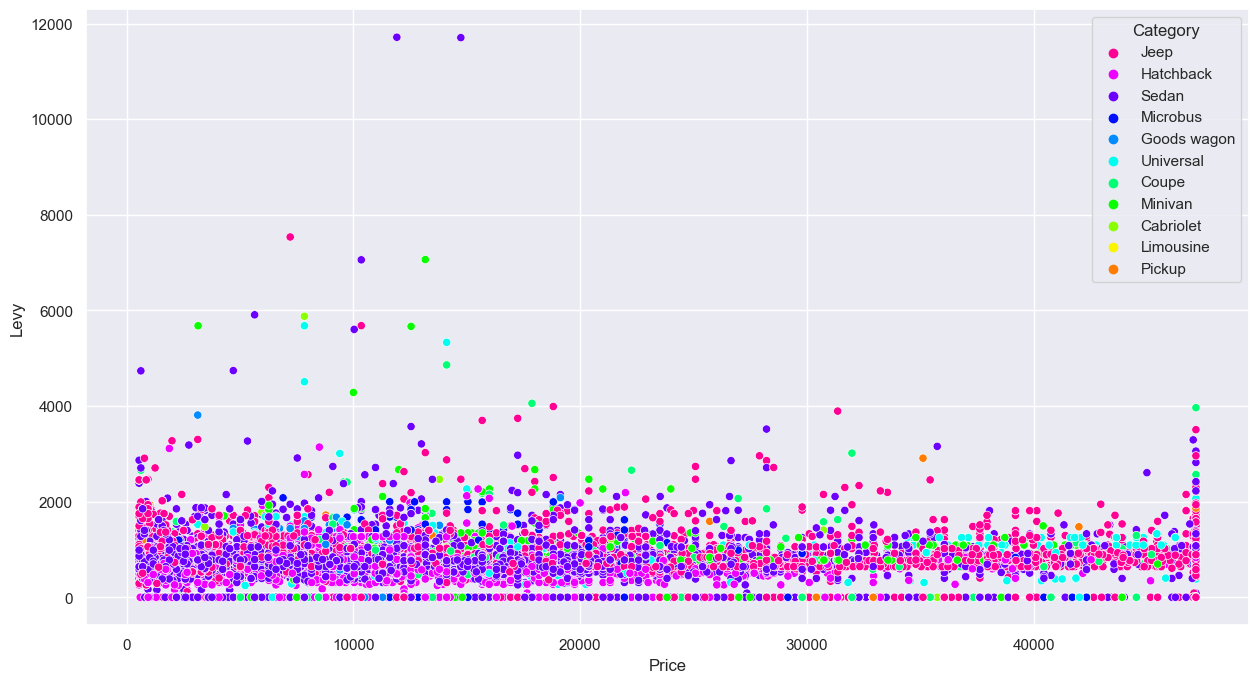

In [55]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_car, x='Price', y='Levy', hue="Category", palette="hsv_r")

<AxesSubplot:xlabel='Engine_volume', ylabel='Density'>

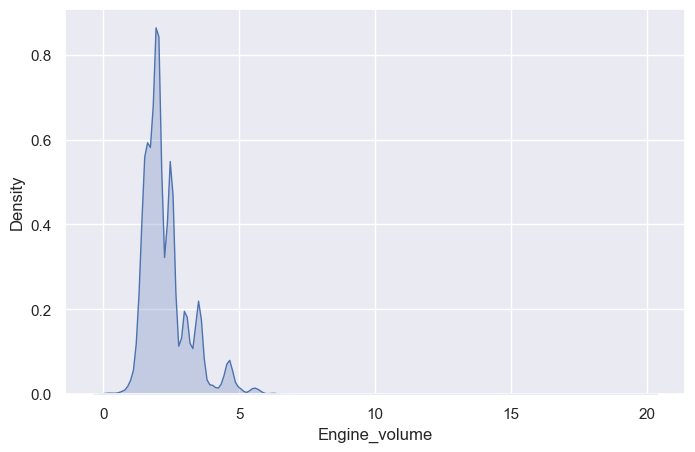

In [56]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df_car['Engine_volume'], shade = True)

<AxesSubplot:xlabel='Fuel_type', ylabel='Price'>

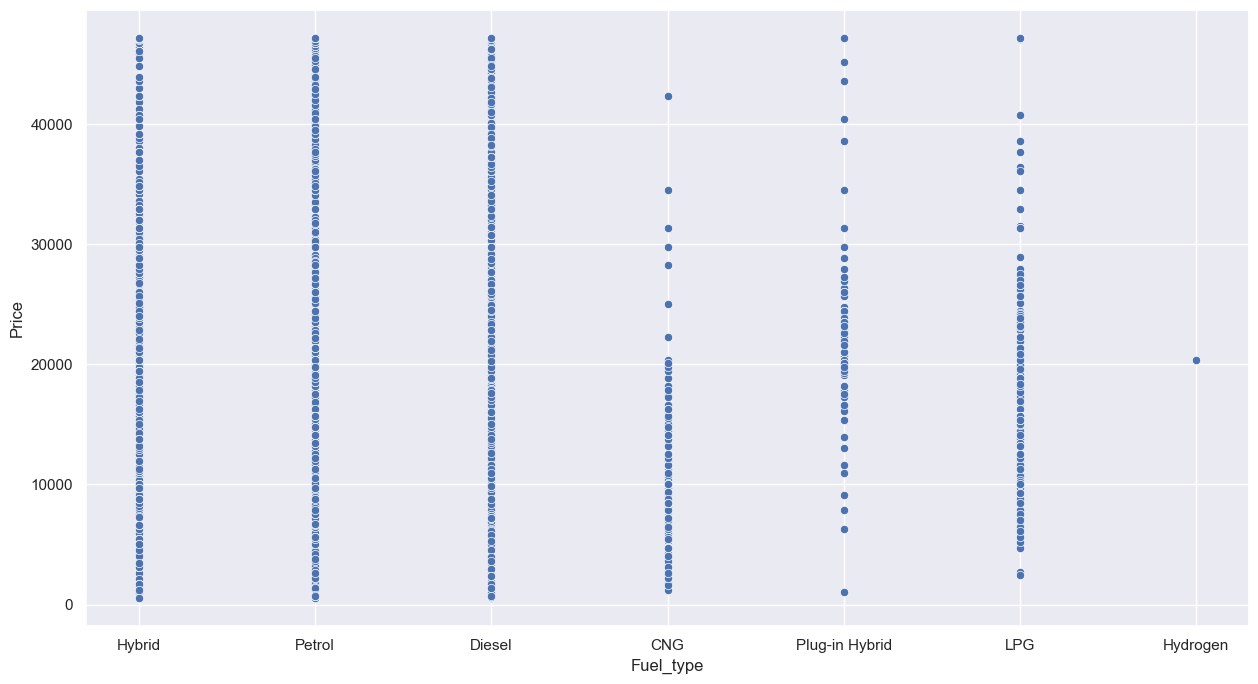

In [57]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_car, y='Price', x='Fuel_type', palette="hsv_r")

<AxesSubplot:xlabel='Fuel_type', ylabel='Mileage'>

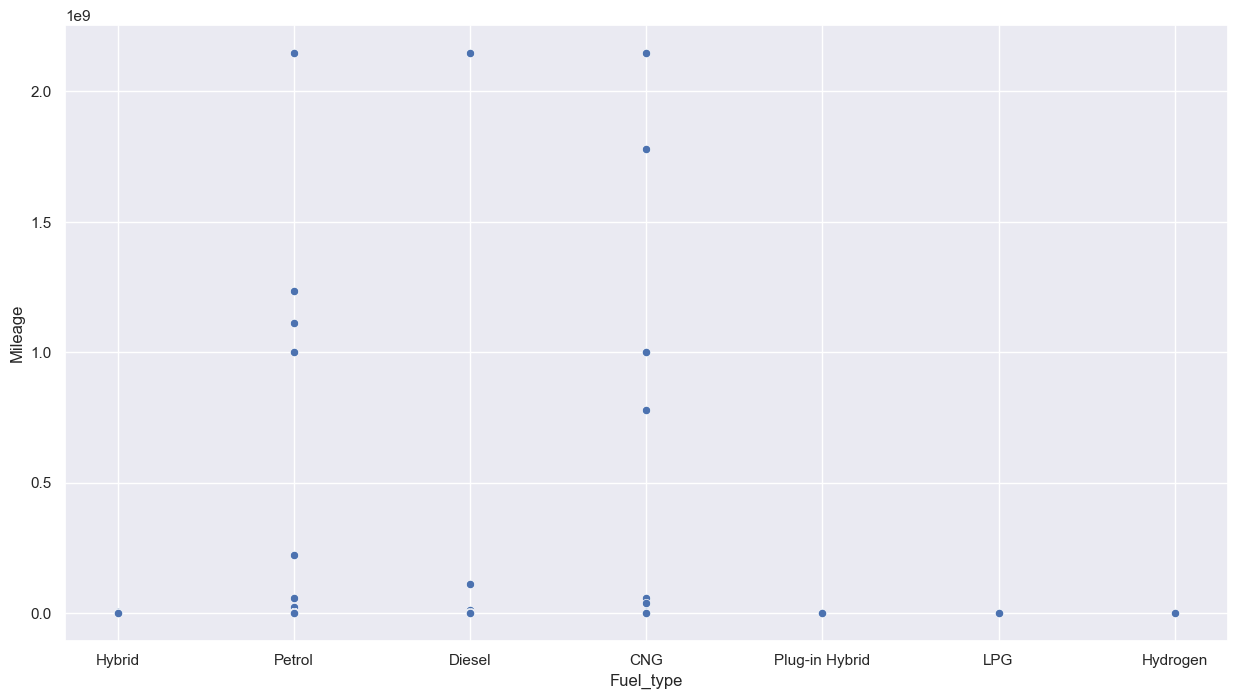

In [58]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_car, y='Mileage', x='Fuel_type', palette="hsv_r")

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

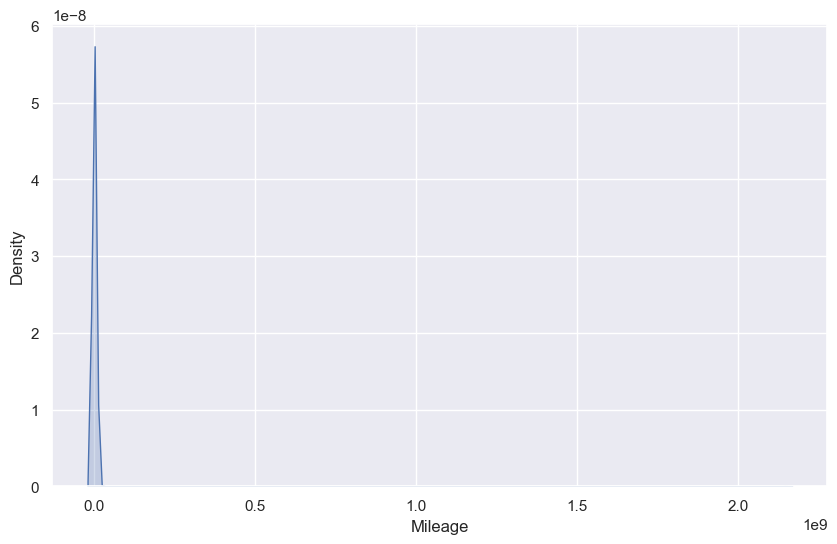

In [59]:
sns.kdeplot(df_car['Mileage'], color='b',shade=True)

<AxesSubplot:xlabel='Airbags', ylabel='Density'>

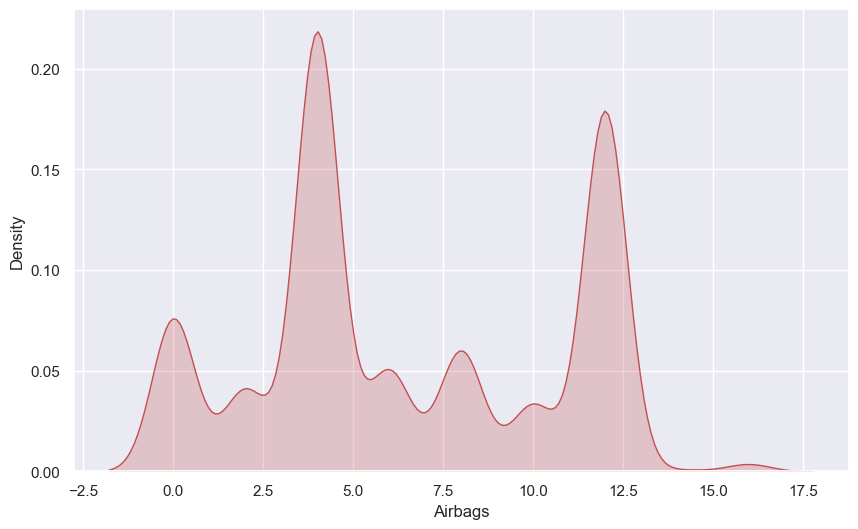

In [60]:
sns.kdeplot(df_car['Airbags'], color='r', shade=True)

In [61]:
df_car.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Prod_year        0.365890
Engine_volume    0.132103
Cylinders        0.079918
Levy             0.065355
Doors            0.043083
Mileage         -0.020344
Airbags         -0.030558
age_of_car      -0.365890
Name: Price, dtype: float64

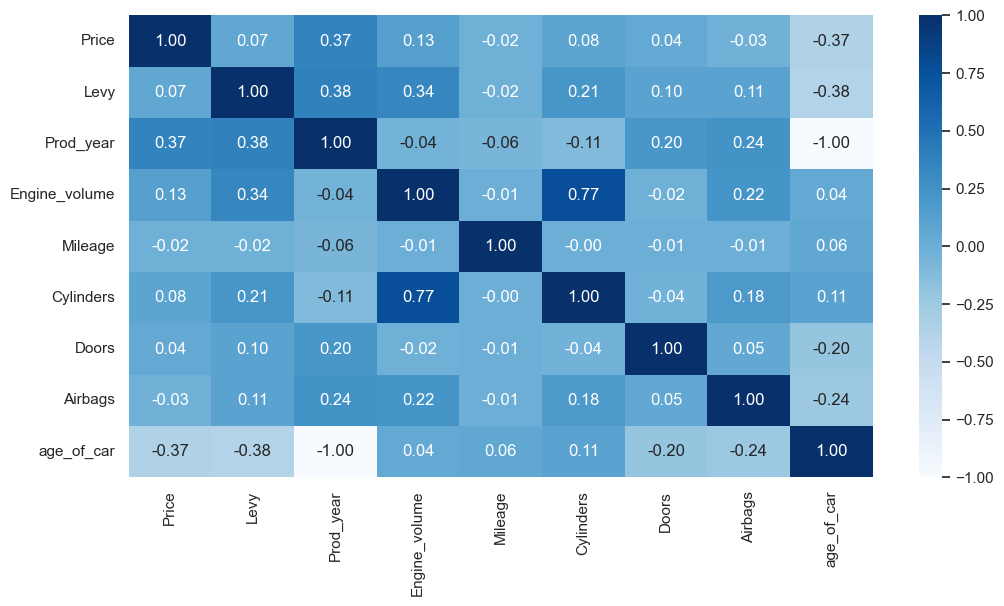

In [62]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_car.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

In [63]:
numerical_col

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Doors,Airbags
0,13328,1399,2010,3.5,186005,6.0,4,12
1,16621,1018,2011,3.0,192000,6.0,4,8
2,8467,0,2006,1.3,200000,4.0,4,2
3,3607,862,2011,2.5,168966,4.0,4,0
4,11726,446,2014,1.3,91901,4.0,4,4
...,...,...,...,...,...,...,...,...
19232,8467,0,1999,2.0,300000,4.0,2,5
19233,15681,831,2011,2.4,161600,4.0,4,8
19234,26108,836,2010,2.0,116365,4.0,4,4
19235,5331,1288,2007,2.0,51258,4.0,4,4


In [64]:
categorical_col

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


**Droppings**

In [65]:
## drop useless features

In [66]:
type(df_car)

pandas.core.frame.DataFrame

In [67]:
df_car.drop('Prod_year', axis=1,inplace=True)

/var/folders/4l/m0n4l9795fx07z4mjgq44m580000gn/T/ipykernel_8682/2204148574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car.drop('Prod_year', axis=1,inplace=True)


In [68]:
df_car.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'age_of_car'],
      dtype='object')

In [69]:
## Encoding

In [70]:
pd.set_option('display.max_columns', 100)
df_car.head()

,Price,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,age_of_car
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,12
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,9


In [71]:
for col in df_car.select_dtypes('object').columns:
    le = LabelEncoder()
    df_car[col] = le.fit_transform(df_car[col])

/var/folders/4l/m0n4l9795fx07z4mjgq44m580000gn/T/ipykernel_8682/219679050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car[col] = le.fit_transform(df_car[col])


In [72]:
df_car.head()

,Price,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,age_of_car
0,13328,1399,32,1230,4,1,2,3.5,186005,6.0,0,0,4,0,12,12,13
1,16621,1018,8,650,4,0,5,3.0,192000,6.0,2,0,4,0,1,8,12
2,8467,0,21,676,3,0,5,1.3,200000,4.0,3,1,4,1,1,2,17
3,3607,862,16,653,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,12
4,11726,446,21,676,3,1,5,1.3,91901,4.0,0,1,4,0,12,4,9


In [73]:
##Splitting Data

In [74]:
features = df_car.drop('Price', axis = 1)
target = df_car['Price']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [76]:
X_train.shape, X_test.shape

((13831, 16), (3458, 16))

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

In [78]:
features

,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,age_of_car
0,1399,32,1230,4,1,2,3.5,186005,6.0,0,0,4,0,12,12,13
1,1018,8,650,4,0,5,3.0,192000,6.0,2,0,4,0,1,8,12
2,0,21,676,3,0,5,1.3,200000,4.0,3,1,4,1,1,2,17
3,862,16,653,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,12
4,446,21,676,3,1,5,1.3,91901,4.0,0,1,4,0,12,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055,36,594,9,1,1,3.5,107800,6.0,0,2,4,0,7,12,10
19232,0,36,382,1,1,0,2.0,300000,4.0,1,2,2,0,12,5,24
19233,831,23,1316,9,1,5,2.4,161600,4.0,2,1,4,0,11,8,12
19234,836,23,1419,4,1,1,2.0,116365,4.0,0,1,4,0,7,4,13


In [79]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)


regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('XGBRegressor', xgb)]

Linear Regression : 26 %
K Nearest Neighbours : 17 %
Decision Tree : 47 %
Random Forest : 81 %
XGBRegressor : 81 %


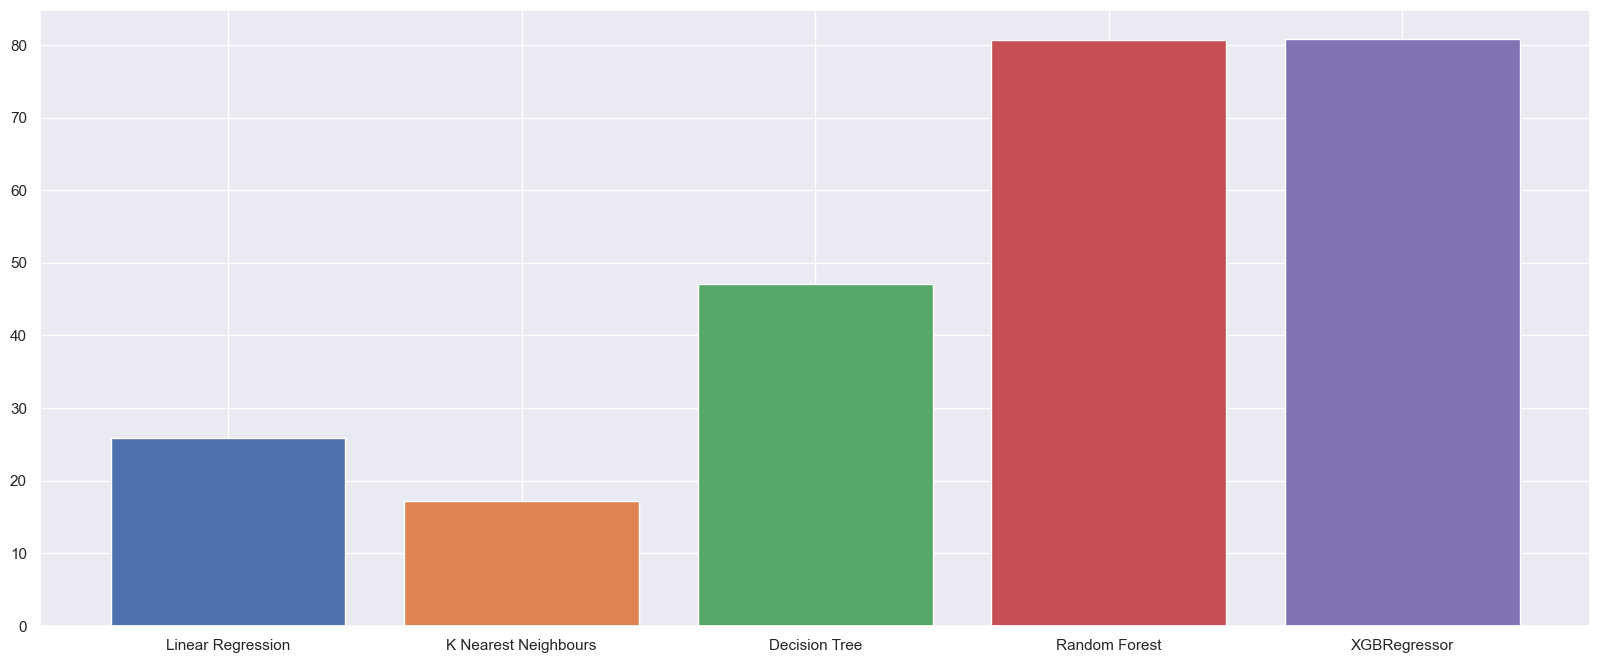

In [80]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    
    #accuracy = round(r2_score(y_test,y_pred),3)*100
    
    #print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    #plt.rcParams["figure.figsize"] = (20,8)
    #plt.bar(regressor_name,accuracy)

In [ ]:
y_pred[:10]


In [ ]:
y_test[:10]

In [ ]:
regressor.score(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)

In [81]:
##Best Model

In [82]:
model = RandomForestRegressor(random_state  = 42)
model.fit(X_train, y_train)


y_pred = rf.predict(X_test)

In [83]:
X_test.columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather_interior',
       'Fuel_type', 'Engine_volume', 'Mileage', 'Cylinders', 'Gear_box_type',
       'Drive_wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'age_of_car'],
      dtype='object')

In [ ]:
## i need to get the score to train & test to know if there over fitt or no

### Grid Search

In [86]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators' : [100,200, 300, 400, 500],'max_depth' : [5,6,8,10],'min_samples_split': [3, 4, 5, 6]}

grid_search = RandomizedSearchCV(model, param_distributions = params, scoring = 'r2', cv = 5)

grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'min_samples_split': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='r2')

In [87]:
grid_search.best_params_

{'n_estimators': 400, 'min_samples_split': 4, 'max_depth': 8}

In [88]:
model = RandomForestRegressor(n_estimators=400,min_samples_split= 4, max_depth= 8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Check Prediction


In [89]:
r2_score(y_test,y_pred)

0.8102256316242241

In [90]:
y_pred.astype(int)[:20]

array([37648,  6645, 32243, 11590, 13685, 45805, 19287, 25720, 26055,
       33214,  8602, 30047,  9028,  4361, 18176, 17065, 32867, 27145,
       22460,  8198])

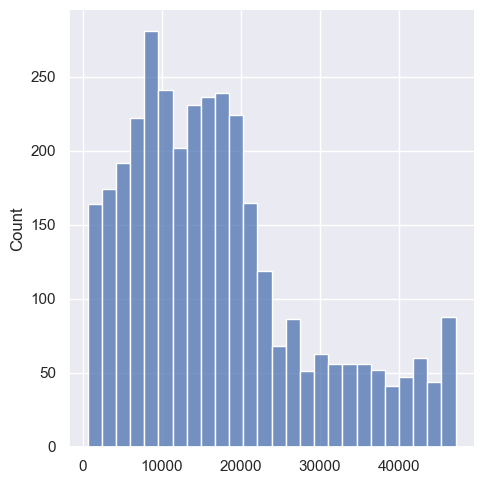

In [91]:
sns.displot(y_pred)

### Final testing

In [92]:
import joblib

joblib.dump(model, 'model.h5')


['model.h5']

In [93]:
model

RandomForestRegressor(n_estimators=500)